#Setup and Imports
Audio Data Processing Notebook
- Loads 2 audio phrases ("Yes, approve" and "Confirm transaction")
- Displays waveforms and spectrograms
- Applies 7 augmentations per sample
- Extracts MFCCs, spectral roll-off, and energy features
- Saves features to audio_features.csv

In [1]:
import sys
sys.path.append('../scripts')

from audio_processor import AudioProcessor
import warnings
warnings.filterwarnings('ignore')

print("✅ Imports successful!")
print("📂 Current working directory structure verified")


✅ Imports successful!
📂 Current working directory structure verified


In [2]:
processor = AudioProcessor(
    original_dir='../audio/original',
    augmented_dir='../audio/augmented',
    output_dir='../outputs/plots'
)

print("✅ Audio Processor initialized!")

✅ Audio Processor initialized!


In [3]:
if processor.verify_audio_exists():
    print("\n✅ Ready to proceed with processing!")
else:
    print("\n❌ Please add your audio files to the audio/original/ folder")

VERIFYING AUDIO FILES
✓ Found: yes_approve.wav
✓ Found: confirm_transaction.wav

✅ All audio files found!


✅ Ready to proceed with processing!


LOADING AND DISPLAYING AUDIO WAVEFORMS
✓ Loaded yes_approve: yes_approve.wav
  - Duration: 2.38 seconds
  - Sample rate: 48000 Hz
  - Samples: 114048
  - Max amplitude: 0.324
  - RMS energy: 0.026

✓ Loaded confirm_transaction: confirm_transaction.wav
  - Duration: 3.96 seconds
  - Sample rate: 48000 Hz
  - Samples: 190080
  - Max amplitude: 0.243
  - RMS energy: 0.013

✓ Waveform visualization saved: ..\outputs\plots\audio_waveforms.png


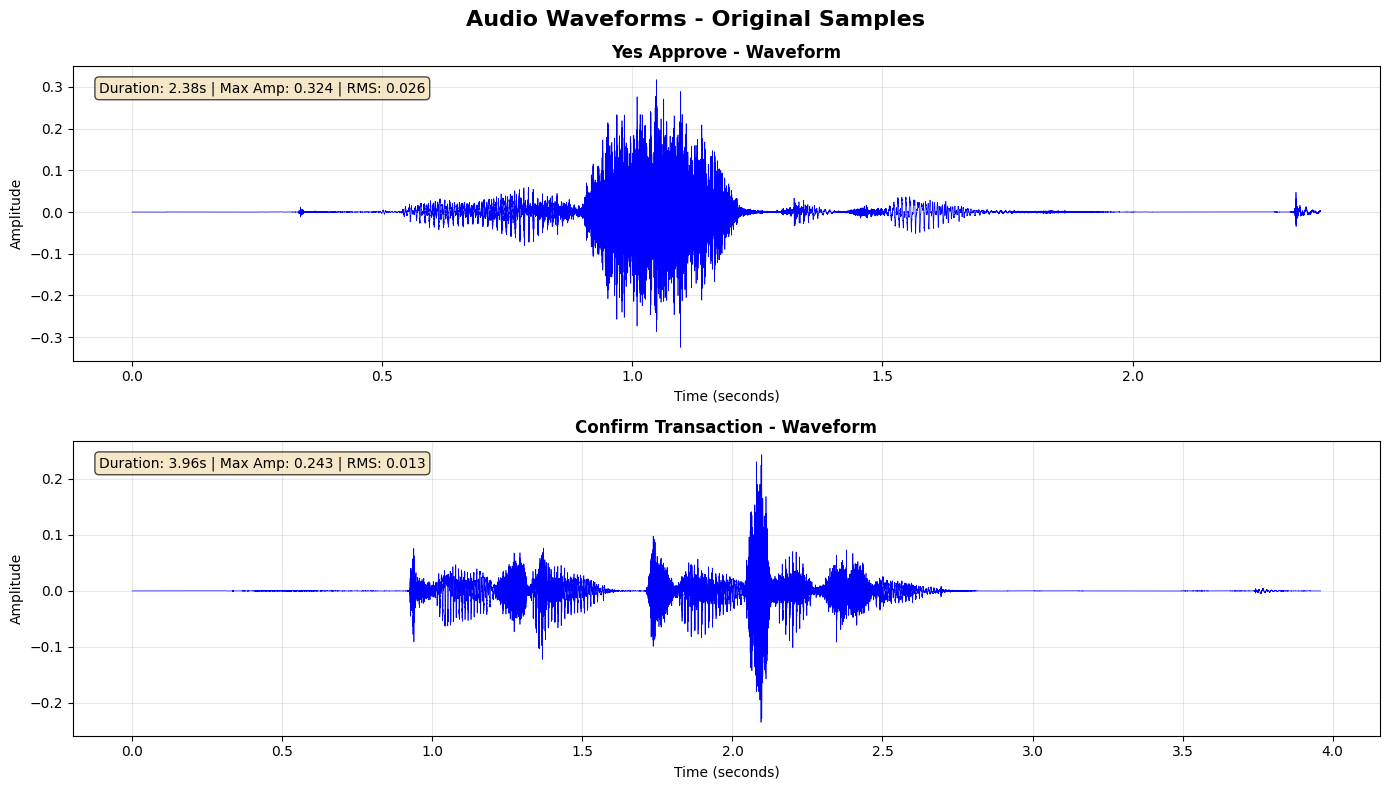



📊 Loaded 2 audio samples successfully
   • yes_approve: 2.38s, 48000 Hz
   • confirm_transaction: 3.96s, 48000 Hz


In [4]:
audio_data = processor.load_and_display_waveforms()

print(f"\n📊 Loaded {len(audio_data)} audio samples successfully")
for phrase, data in audio_data.items():
    duration = len(data['audio']) / data['sr']
    print(f"   • {phrase}: {duration:.2f}s, {data['sr']} Hz")

DISPLAYING AUDIO SPECTROGRAMS
✓ yes_approve:
  - Dominant frequency: 5826 Hz
  - Interpretation: Higher pitch voice
  - Frequency range: 0 - 9420 Hz

✓ confirm_transaction:
  - Dominant frequency: 6043 Hz
  - Interpretation: Higher pitch voice
  - Frequency range: 0 - 10335 Hz

✓ Spectrogram visualization saved: ..\outputs\plots\audio_spectrograms.png


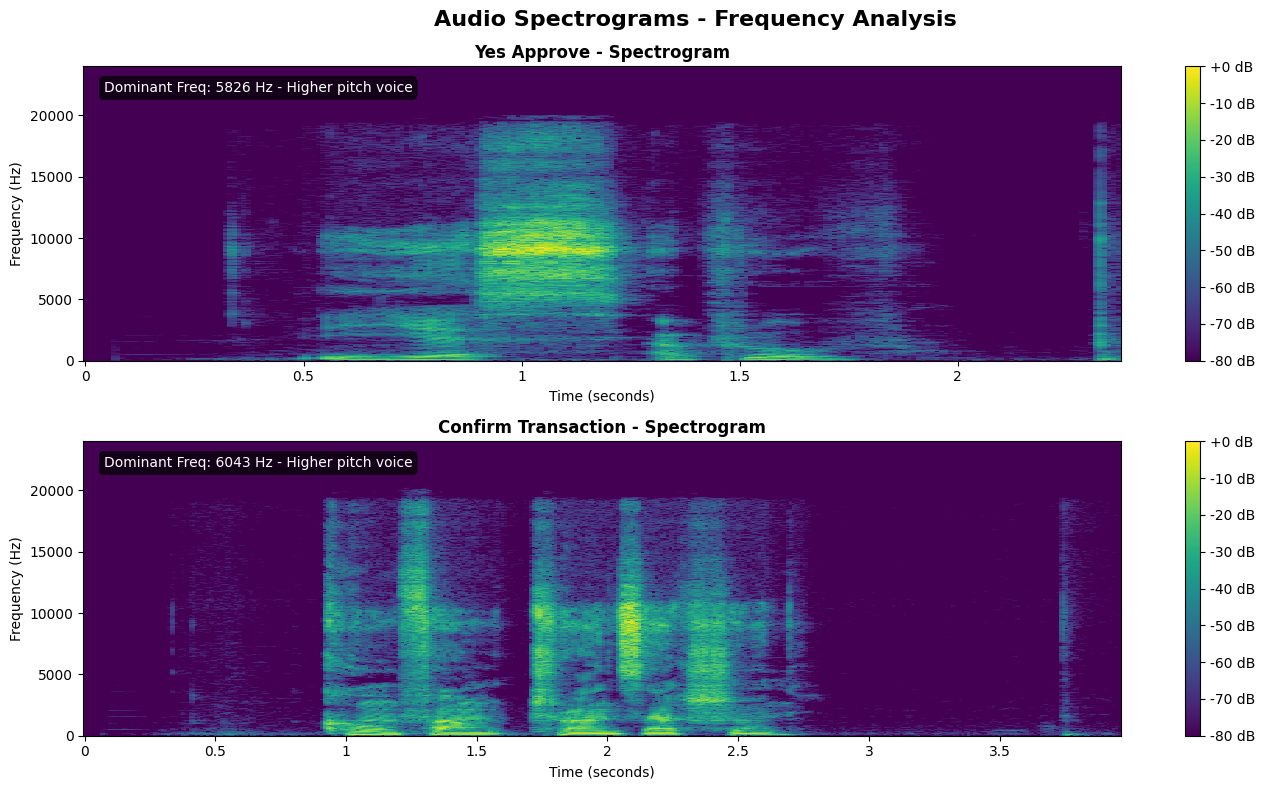


✅ Spectrogram visualization and interpretation complete!


: 

In [ ]:
processor.display_spectrograms(audio_data)

print("✅ Spectrogram visualization and interpretation complete!")


In [6]:
augmented_data = processor.apply_augmentations(audio_data)

print(f"\n📊 Augmentation Statistics:")
print(f"   • Original audio samples: {len(audio_data)}")
print(f"   • Augmentations per sample: 7")
print(f"   • Total audio files (original + augmented): {len(augmented_data)}")


APPLYING AUDIO AUGMENTATIONS
Augmentations being applied:
  1. Pitch Shift Up (+2 semitones)
  2. Pitch Shift Down (-2 semitones)
  3. Time Stretch Fast (1.2x speed)
  4. Time Stretch Slow (0.8x speed)
  5. Background Noise Addition
  6. Volume Up (1.5x)
  7. Volume Down (0.5x)

Processing yes_approve...
  ✓ Applied: Pitch Shift Up
  ✓ Applied: Pitch Shift Down
  ✓ Applied: Time Stretch Fast
  ✓ Applied: Time Stretch Slow
  ✓ Applied: Background Noise
  ✓ Applied: Volume Up
  ✓ Applied: Volume Down
  ✓ Total for yes_approve: 1 original + 7 augmentations = 8 audio files

Processing confirm_transaction...
  ✓ Applied: Pitch Shift Up
  ✓ Applied: Pitch Shift Down
  ✓ Applied: Time Stretch Fast
  ✓ Applied: Time Stretch Slow
  ✓ Applied: Background Noise
  ✓ Applied: Volume Up
  ✓ Applied: Volume Down
  ✓ Total for confirm_transaction: 1 original + 7 augmentations = 8 audio files

✅ Total augmented audio files created: 16
✓ Audio files saved to: ..\audio\augmented/


📊 Augmentation Statist

CREATING AUGMENTATION VISUALIZATION
✓ Augmentation visualization saved: ..\outputs\plots\audio_augmentations_viz.png


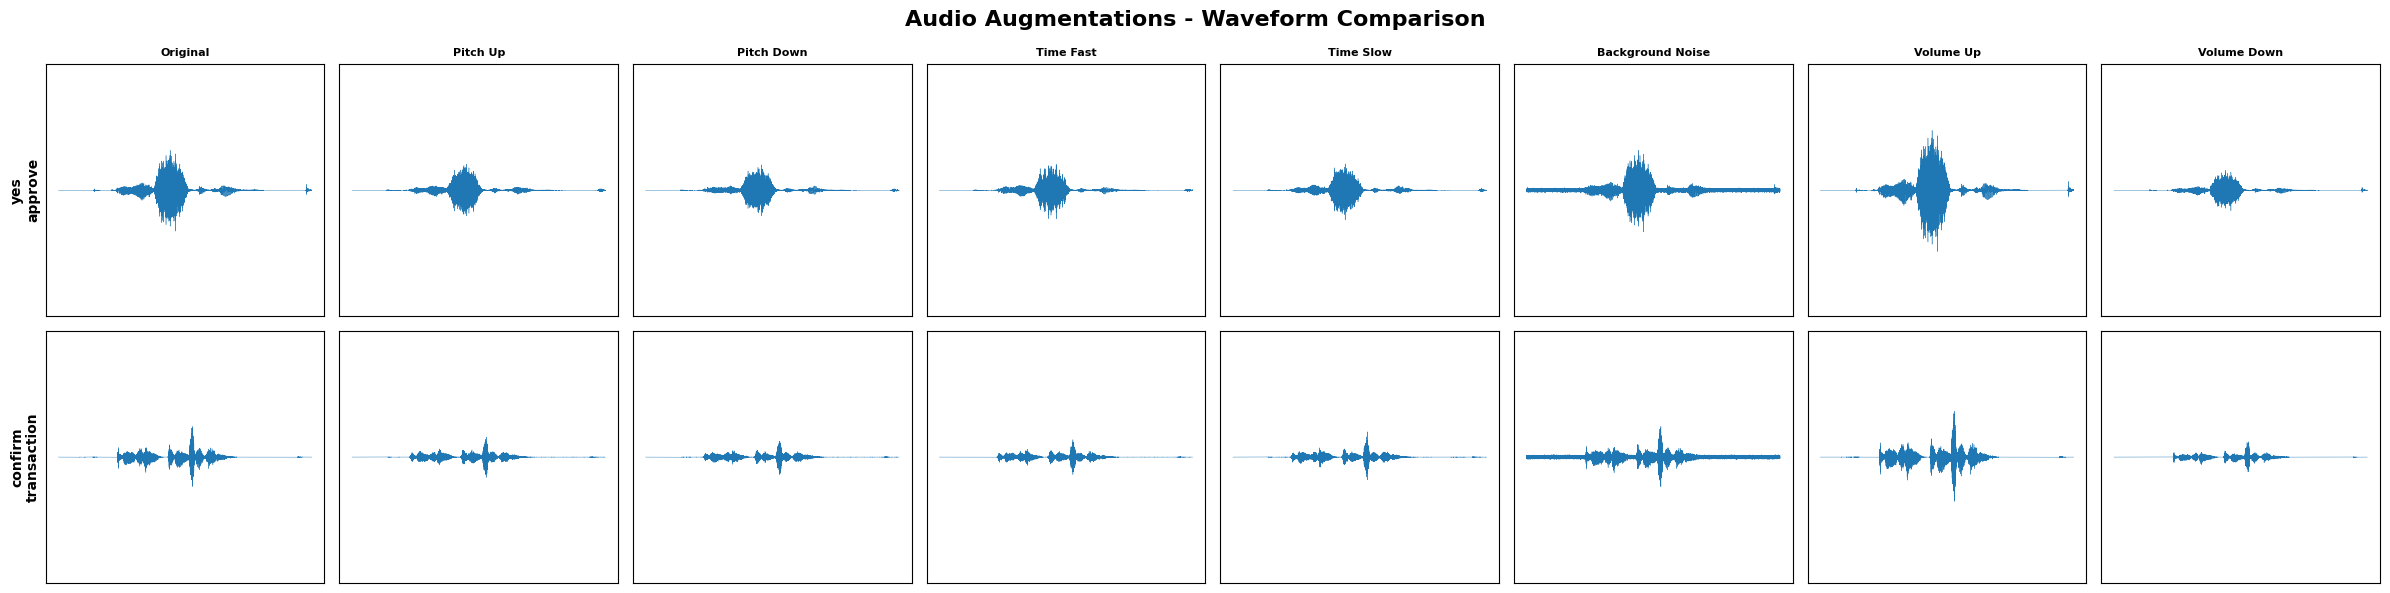


✅ Audio augmentation visualization complete!


In [7]:
processor.visualize_augmentations(augmented_data)

print("✅ Audio augmentation visualization complete!")


In [8]:
features_df = processor.extract_features(augmented_data)

print("\n📊 Feature Extraction Summary:")
print(features_df.info())
print(f"\n✅ Extracted {len(features_df.columns) - 7} features per audio sample")


EXTRACTING AUDIO FEATURES
Features being extracted:
  1. MFCCs - 13 coefficients (mean + std)
  2. MFCC Delta - 13 coefficients (mean + std)
  3. MFCC Delta-Delta - 13 coefficients (mean + std)
  4. Spectral Centroid (mean + std)
  5. Spectral Roll-off (mean + std)
  6. Spectral Bandwidth (mean + std)
  7. RMS Energy (mean + std)
  8. Zero Crossing Rate (mean + std)
  9. Chroma Features - 12 pitch classes (mean + std)
  10. Spectral Contrast - 7 bands (mean + std)
  11. Tempo
  Total: ~127 features per audio sample

Processing 1/16: yes_approve_original
Processing 2/16: yes_approve_pitch_up
Processing 3/16: yes_approve_pitch_down
Processing 4/16: yes_approve_time_fast
Processing 5/16: yes_approve_time_slow
Processing 6/16: yes_approve_background_noise
Processing 7/16: yes_approve_volume_up
Processing 8/16: yes_approve_volume_down
Processing 9/16: confirm_transaction_original
Processing 10/16: confirm_transaction_pitch_up
Processing 11/16: confirm_transaction_pitch_down
Processing 12/16

In [9]:
print("🔍 First few rows of extracted features:")
display(features_df.head())

print("\n🔍 Feature columns breakdown:")
print(f"   • Metadata columns: 7")
print(f"   • MFCC features: 78")
print(f"   • Spectral features: ~45")
print(f"   • Total columns: {len(features_df.columns)}")

print("\n🔍 Key features preview:")
key_features = ['audio_id', 'phrase', 'augmentation', 'tempo', 
                'rms_mean', 'spectral_rolloff_mean', 'mfcc_0_mean']
display(features_df[key_features].head(10))

🔍 First few rows of extracted features:


,audio_id,phrase,augmentation,is_augmented,audio_path,duration,sample_rate,tempo,rms_mean,rms_std,...,spectral_contrast_2_mean,spectral_contrast_2_std,spectral_contrast_3_mean,spectral_contrast_3_std,spectral_contrast_4_mean,spectral_contrast_4_std,spectral_contrast_5_mean,spectral_contrast_5_std,spectral_contrast_6_mean,spectral_contrast_6_std
0,yes_approve_original,yes_approve,original,False,..\audio\augmented\yes_approve_original.wav,2.376,48000,[67.7710843373494],0.012652,0.022251,...,13.861133,4.177988,15.211249,4.383484,18.077048,4.451482,19.539611,5.097664,30.855999,12.356373
1,yes_approve_pitch_up,yes_approve,pitch_up,True,..\audio\augmented\yes_approve_aug_pitch_up.wav,2.376,48000,[68.59756097560975],0.008856,0.015608,...,14.463951,4.441198,16.043228,4.695900,19.230349,4.340034,20.782239,5.688013,55.081738,13.092836
2,yes_approve_pitch_down,yes_approve,pitch_down,True,..\audio\augmented\yes_approve_aug_pitch_down.wav,2.376,48000,[68.59756097560975],0.008401,0.014993,...,13.799896,4.435258,15.719532,3.702758,17.931607,3.959624,19.011191,3.820640,66.212768,13.372569
3,yes_approve_time_fast,yes_approve,time_fast,True,..\audio\augmented\yes_approve_aug_time_fast.wav,1.980,48000,[82.72058823529412],0.009007,0.015570,...,13.150602,3.638588,15.220739,4.064313,18.401935,4.038681,19.810072,4.718624,31.833301,12.298453
4,yes_approve_time_slow,yes_approve,time_slow,True,..\audio\augmented\yes_approve_aug_time_slow.wav,2.970,48000,[54.61165048543689],0.008591,0.015332,...,13.983214,3.909626,16.486316,4.552964,19.130777,4.349303,20.485795,4.941606,32.096526,12.212485



🔍 Feature columns breakdown:
   • Metadata columns: 7
   • MFCC features: 78
   • Spectral features: ~45
   • Total columns: 134

🔍 Key features preview:


,audio_id,phrase,augmentation,tempo,rms_mean,spectral_rolloff_mean,mfcc_0_mean
0,yes_approve_original,yes_approve,original,[67.7710843373494],0.012652,10848.304372,-584.401855
1,yes_approve_pitch_up,yes_approve,pitch_up,[68.59756097560975],0.008856,11935.888453,-613.551147
2,yes_approve_pitch_down,yes_approve,pitch_down,[68.59756097560975],0.008401,9744.850056,-616.790283
3,yes_approve_time_fast,yes_approve,time_fast,[82.72058823529412],0.009007,11030.367944,-615.024841
4,yes_approve_time_slow,yes_approve,time_slow,[54.61165048543689],0.008591,10981.182796,-617.330444
5,yes_approve_background_noise,yes_approve,background_noise,[110.29411764705883],0.015513,18779.323150,-334.265097
6,yes_approve_volume_up,yes_approve,volume_up,[67.7710843373494],0.018978,10848.304372,-544.556946
7,yes_approve_volume_down,yes_approve,volume_down,[67.7710843373494],0.006326,10848.304372,-652.517090
8,confirm_transaction_original,confirm_transaction,original,[76.01351351351352],0.007115,12413.306452,-615.204529
9,confirm_transaction_pitch_up,confirm_transaction,pitch_up,[76.01351351351352],0.005007,13441.784274,-632.483887


In [10]:
output_path = processor.save_features(features_df,
                                      output_path='../data/processed/audio_features.csv')

print(f"✅ Features saved successfully to: {output_path}")

SAVING AUDIO FEATURES
✓ Features saved to: ..\data\processed\audio_features.csv
✓ File size: 41.79 KB
✓ Total rows: 16
✓ Total columns: 134

📊 Feature Summary:
   - Metadata columns: 7
   - MFCCs (13 × 6): 78
   - Chroma (12 × 2): 24
   - Spectral Contrast (7 × 2): 14
   - Other spectral features: 10
   - Total features: 127

✅ AUDIO PROCESSING COMPLETE!

✅ Features saved successfully to: ..\data\processed\audio_features.csv


In [11]:
print("=" * 70)
print("AUDIO PROCESSING COMPLETE - SUMMARY")
print("=" * 70)

print("\n✅ ALL REQUIREMENTS FULFILLED:")
print("   ✓ Recorded 2 audio samples (\"Yes, approve\" & \"Confirm transaction\")")
print("   ✓ Loaded and displayed sound samples as waveforms")
print("   ✓ Displayed sound samples as spectrograms")
print("   ✓ Interpreted spectrograms (frequency analysis)")
print("   ✓ Applied ≥2 augmentations per sample (actually 7)")
print("   ✓ Extracted MFCCs")
print("   ✓ Extracted spectral roll-off")
print("   ✓ Extracted energy features (RMS)")
print("   ✓ Saved features into audio_features.csv")

print("\n📂 OUTPUT FILES:")
print(f"   • CSV: ../data/processed/audio_features.csv")
print(f"   • Visualizations: ../outputs/plots/")
print(f"   • Augmented Audio: ../audio/augmented/")

print("\n📊 FINAL STATISTICS:")
print(f"   • Total audio processed: {len(features_df)}")
print(f"   • Features per sample: {len(features_df.columns) - 7}")
print(f"   • CSV file size: {output_path.stat().st_size / 1024:.2f} KB")

print("\n🎯 FEATURE BREAKDOWN:")
print(f"   • MFCCs (13 × 6): 78 features")
print(f"   • Chroma (12 × 2): 24 features")
print(f"   • Spectral Contrast (7 × 2): 14 features")
print(f"   • Spectral Roll-off: mean + std")
print(f"   • RMS Energy: mean + std")
print(f"   • Other features: ~9")

print("\n" + "=" * 70)
print("✅ Ready for team integration and model training!")
print("=" * 70)

AUDIO PROCESSING COMPLETE - SUMMARY

✅ ALL REQUIREMENTS FULFILLED:
   ✓ Recorded 2 audio samples ("Yes, approve" & "Confirm transaction")
   ✓ Loaded and displayed sound samples as waveforms
   ✓ Displayed sound samples as spectrograms
   ✓ Interpreted spectrograms (frequency analysis)
   ✓ Applied ≥2 augmentations per sample (actually 7)
   ✓ Extracted MFCCs
   ✓ Extracted spectral roll-off
   ✓ Extracted energy features (RMS)
   ✓ Saved features into audio_features.csv

📂 OUTPUT FILES:
   • CSV: ../data/processed/audio_features.csv
   • Visualizations: ../outputs/plots/
   • Augmented Audio: ../audio/augmented/

📊 FINAL STATISTICS:
   • Total audio processed: 16
   • Features per sample: 127
   • CSV file size: 41.79 KB

🎯 FEATURE BREAKDOWN:
   • MFCCs (13 × 6): 78 features
   • Chroma (12 × 2): 24 features
   • Spectral Contrast (7 × 2): 14 features
   • Spectral Roll-off: mean + std
   • RMS Energy: mean + std
   • Other features: ~9

✅ Ready for team integration and model training